In [1]:

# Data Cleaning and Preprocessing
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = '/workspaces/fdap-2024-chintan-wadhwa/duesseldorf_listings_no_description.csv'
data = pd.read_csv(file_path)


In [3]:
# Remove unnecessary columns
data = data.drop(columns=['full_link', 'landlord'])

# Convert price and size to numerical values
data['price'] = data['price'].str.replace('€', '').str.replace(',', '').astype(float)
data['size'] = data['size'].str.replace('m²', '').astype(float)


In [4]:
# Standardize online_status to minutes
def convert_online_status(status):
    if 'minute' in status:
        return int(re.findall(r'\d+', status)[0])
    elif 'hour' in status:
        return int(re.findall(r'\d+', status)[0]) * 60
    elif 'day' in status:
        return int(re.findall(r'\d+', status)[0]) * 1440
    return 0

data['online_status'] = data['online_status'].apply(convert_online_status)


In [5]:
# Custom list of German stopwords
custom_stopwords = [
    'und', 'oder', 'aber', 'dass', 'weil', 'wenn', 'kann', 'ich', 'du', 'er', 
    'sie', 'es', 'wir', 'ihr', 'ihnen', 'im', 'des', 'mit', 'ist', 'auf', 'an',
    'am', 'für', 'in', 'zu', 'der', 'die', 'das', 'ein', 'eine', 'einer', 'eines'
]

# Basic cleaning function without using NLTK
def simple_clean_title(title):
    title = title.lower()
    words = re.findall(r'\b\w+\b', title)
    words_filtered = [word for word in words if word not in custom_stopwords]
    return ' '.join(words_filtered)

data['clean_title'] = data['details'].apply(simple_clean_title)



Text(0, 0.5, 'Frequency')

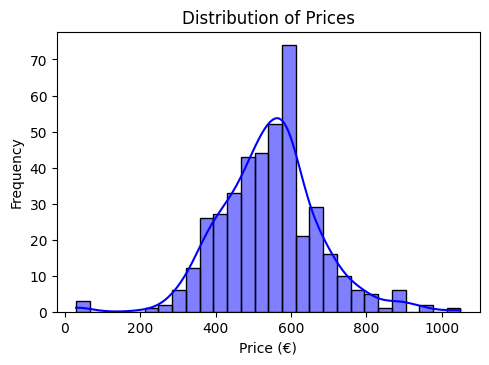

In [6]:
# Remove the original 'title' column as it's now cleaned
data = data.drop(columns=['details'])

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 8))

# Distribution of Prices
plt.subplot(2, 2, 1)
sns.histplot(data['price'], kde=True, color='blue')
plt.title('Distribution of Prices')
plt.xlabel('Price (€)')
plt.ylabel('Frequency')



Text(0, 0.5, 'Frequency')

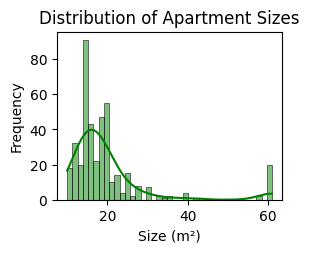

In [7]:
# Distribution of Apartment Sizes
plt.subplot(2, 2, 2)
sns.histplot(data['size'], kde=True, color='green')
plt.title('Distribution of Apartment Sizes')
plt.xlabel('Size (m²)')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

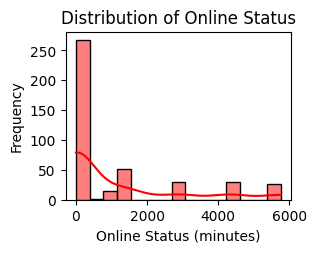

In [8]:
# Online Status Analysis
plt.subplot(2, 2, 3)
sns.histplot(data['online_status'], kde=True, color='red')
plt.title('Distribution of Online Status')
plt.xlabel('Online Status (minutes)')
plt.ylabel('Frequency')


Text(0, 0.5, 'Price (€)')

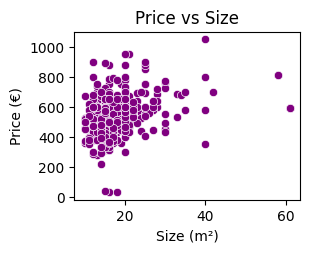

In [9]:
# Relationships between Price and Size
plt.subplot(2, 2, 4)
sns.scatterplot(x='size', y='price', data=data, color='purple')
plt.title('Price vs Size')
plt.xlabel('Size (m²)')
plt.ylabel('Price (€)')


In [10]:
plt.tight_layout()
plt.savefig('eda_plots.png')
plt.close()


In [11]:
# Regression Analysis / Machine Learning
# Prepare the data for regression
X = data[['size', 'online_status']]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Make predictions
y_pred = model.predict(X_test)


In [15]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

15186.065940790097 0.05666075533677817


In [16]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])


In [17]:
# Display results
results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R^2 Score'],
    'Value': [mse, r2]
})

print("Model Evaluation Metrics:")
print(results)

print("Regression Coefficients:")
print(coefficients)


Model Evaluation Metrics:
               Metric         Value
0  Mean Squared Error  15186.065941
1           R^2 Score      0.056661
Regression Coefficients:
               Coefficient
size              2.888609
online_status     0.000722
